<a href="https://colab.research.google.com/github/Abhijeet141022/2025-Quantum-Factorization-With-Quantum-Rings/blob/main/Semi_Prime_number_Factorization_Quantum_Sea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install QuantumRingsLib

In [ ]:
pip install qiskit

In [ ]:
import QuantumRingsLib
from QuantumRingsLib import QuantumRegister, AncillaRegister, ClassicalRegister, QuantumCircuit
from QuantumRingsLib import QuantumRingsProvider
from QuantumRingsLib import job_monitor
from QuantumRingsLib import JobStatus
from matplotlib import pyplot as plt
import numpy as np
import QuantumRingsLib
from QuantumRingsLib import QuantumRegister, AncillaRegister, ClassicalRegister, QuantumCircuit
from QuantumRingsLib import QuantumRingsProvider
from QuantumRingsLib import job_monitor
from QuantumRingsLib import JobStatus
from matplotlib import pyplot as plt
import numpy as np
import math

provider = QuantumRingsProvider(token ="rings-200.38cl60bBbGfFa62KV9uJMRzSM0M1pzgG", name="abhijeet20041410@gmail.com")
backend = provider.get_backend("scarlet_quantum_rings")
shots = 1024

provider.active_account()

provider.active_account()

In [4]:
def iqft_cct(qc, b, n):
    """
    The inverse QFT circuit

    Args:

        qc (QuantumCircuit):
                The quantum circuit

        b (QuantumRegister):
                The target register

        n (int):
                The number of qubits in the registers to use

    Returns:
        None

    """

    for i in range (n):
        for j in range (1, i+1):
            # for inverse transform, we have to use negative angles
            qc.cu1(  -math.pi / 2** ( i -j + 1 ), b[j - 1], b[i])
        # the H transform should be done after the rotations
        qc.h(b[i])
    qc.barrier()
    return

def plot_histogram (counts, title=""):
    """
    Plots the histogram of the counts

    Args:

        counts (dict):
            The dictionary containing the counts of states

        titles (str):
            A title for the graph.

    Returns:
        None

    """
    fig, ax = plt.subplots(figsize =(10, 7))
    plt.xlabel("States")
    plt.ylabel("Counts")
    mylist = [key for key, val in counts.items() for _ in range(val)]

    unique, inverse = np.unique(mylist, return_inverse=True)
    bin_counts = np.bincount(inverse)

    plt.bar(unique, bin_counts)

    maxFreq = max(counts.values())
    plt.ylim(ymax=np.ceil(maxFreq / 10) * 10 if maxFreq % 10 else maxFreq + 10)
    # Show plot
    plt.title(title)
    plt.show()
    return

In [34]:
# Number to be factored
N = 214032465024074496126442307283933356300861471514475501833470401473428082563912153408761769413972267628301330991909168765882142662235219960555696693840001224606950518146628119800108710124583699597698695189909469315607145198525044404618368988684553790771130932253208172374728697777758195499531

# Number of qubits required
number_of_qubits = 200
shots = 10000

# Initialize quantum and classical registers
q = QuantumRegister(number_of_qubits, 'q')
c = ClassicalRegister(4, 'c')
qc = QuantumCircuit(q, c)

# Initialize the quantum circuit
qc.h(0)
qc.h(1)
qc.h(2)
qc.x(6)
qc.barrier()

# Modular exponentiation (example transformation, needs to be adapted for 214032465024074496126442307283933356300861471514475501833470401473428082563912153408761769413972267628301330991909168765882142662235219960555696693840001224606950518146628119800108710124583699597698695189909469315607145198525044404618368988684553790771130932253208172374728697777758195499531)
qc.cx(q[2], q[4])
qc.cx(q[2], q[5])
qc.cx(q[6], q[4])
qc.ccx(q[1], q[5], q[3])
qc.cx(q[3], q[5])
qc.ccx(q[1], q[4], q[6])
qc.cx(q[6], q[4])
qc.barrier()

# Inverse Quantum Fourier Transform (IQFT)
def iqft(qc, q, n):
    for j in range(n//2):
        qc.swap(q[j], q[n-j-1])
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), q[m], q[j])
        qc.h(q[j])

iqft(qc, q, 3)

# Measure the qubits
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

# Draw the circuit
qc.draw('mpl')


# Draw the circuit
qc.draw('mpl')

         ┌───┐ ╎                                     ╎    ┌───┐             »
q[0]:   ■┤ H ├─╎─────────────────────────────────────╎──╳─┤ H ├──────■──────»
         ├───┤ ╎                                     ╎  │ └───┘┌─────┴─────┐»
q[1]:   ■┤ H ├─╎──────────────────■─────────■────────╎──│──────┤ P(-pi/2)  ├»
         ├───┤ ╎                  │         │        ╎  │      └───────────┘»
q[2]:   ■┤ H ├─╎───■────■─────────│─────────│────────╎──╳───────────────────»
         └───┘ ╎   │    │       ┌─┴─┐       │        ╎                      »
q[3]:   ■──────╎───│────│───────┤ X ├──■────│────────╎──────────────────────»
               ╎ ┌─┴─┐  │  ┌───┐└─┬─┘  │    │  ┌───┐ ╎                      »
q[4]:   ■──────╎─┤ X ├──│──┤ X ├──│────│────■──┤ X ├─╎──────────────────────»
               ╎ └───┘┌─┴─┐└─┬─┘  │  ┌─┴─┐  │  └─┬─┘ ╎                      »
q[5]:   ■──────╎──────┤ X ├──│────■──┤ X ├──│────│───╎──────────────────────»
         ┌───┐ ╎      └───┘  │       └───┘┌─┴─┐  │   ╎          

Job Running
Job Running
Job Running
Job Done.
Ending Job Monitor


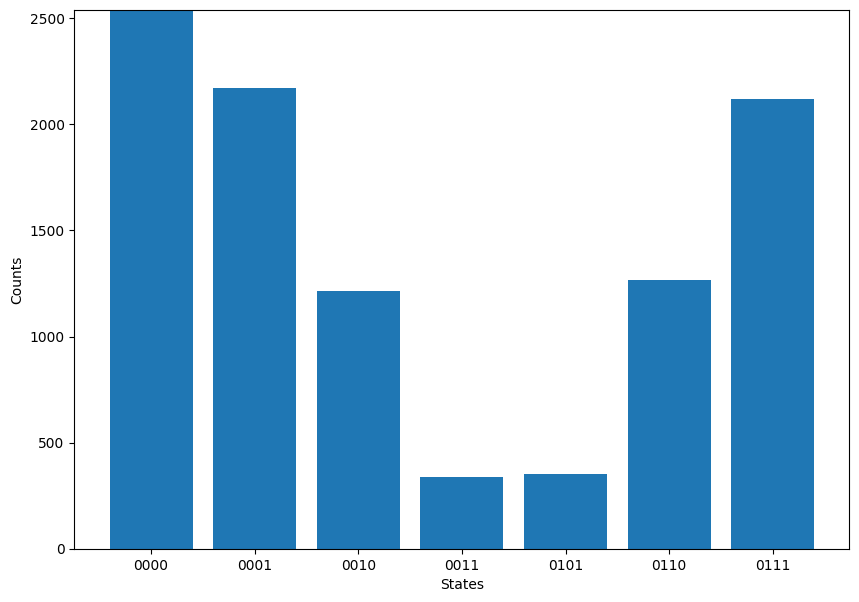

In [35]:
# Execute the circuit
job = backend.run(qc, shots=shots)
job_monitor(job)
result = job.result()
counts = result.get_counts()

# visualize
plot_histogram(counts)

#clean up
del q, c, qc
del result
del job